In [7]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('median_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'median_data.csv'

In [4]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

NameError: name 'df' is not defined

<Axes: xlabel='overall_rating', ylabel='Count'>

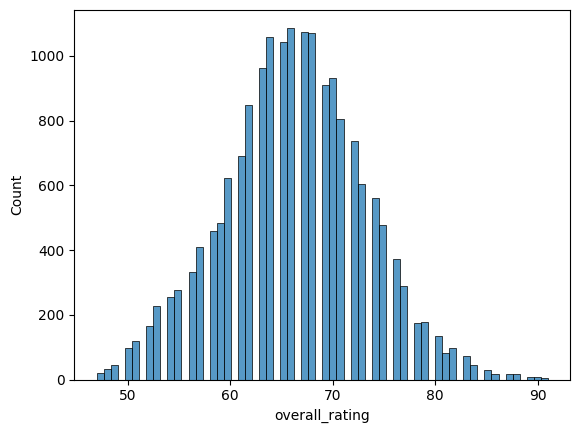

In [57]:
sns.histplot(df['overall_rating'])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_train, y_train_pred, y_test, y_pred):
    print('Train Set:')
    print(f'MSE: {mean_squared_error(y_train, y_train_pred):.3f}')
    print(f'MAE: {mean_absolute_error(y_train, y_train_pred):.3f}')
    print(f'R2: {r2_score(y_train, y_train_pred):.3f}')

    print()

    print('Test Set:')
    print(f'MSE: {mean_squared_error(y_test, y_pred):.3f}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred):.3f}')
    print(f'R2: {r2_score(y_test, y_pred):.3f}')


# Linear Regression

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [61]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_pred)

Train Set:
MSE: 3.241597908854705
MAE: 1.3957993791835461
R2: 0.9332108172033957

Test Set:
MSE: 3.322241837592516
MAE: 1.4153944654802126
R2: 0.9305976827983435


In [10]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_pred)

ValueError: could not convert string to float: 'France'

In [62]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_pred)

Train Set:
MSE: 3.241597908854705
MAE: 1.3957993791835461
R2: 0.9332108172033957

Test Set:
MSE: 3.322241837592516
MAE: 1.4153944654802126
R2: 0.9305976827983435


In [63]:
# Định nghĩa số lượng folds cho cross-validation
cv = 5

# Sử dụng cross_val_score để tính toán R^2 score
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores cho {cv}-fold cross-validation: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

# Sử dụng cross_val_score để tính toán MSE (sử dụng scoring 'neg_mean_squared_error')
mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
# Chuyển đổi MSE về giá trị dương
mse_scores = -mse_scores
print(f"MSE cho {cv}-fold cross-validation: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

# Đánh giá Mean Absolute Error (MAE)
mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE cho {cv}-fold cross-validation: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores cho 5-fold cross-validation: [ 0.88461441 -0.03712584 -0.31376627 -0.50465802  0.75355273]
R^2 trung bình: 0.157 ± 0.563

MSE cho 5-fold cross-validation: [ 2.9821364  11.32902867  3.18050434  2.88853662  3.37137015]
MSE trung bình: 4.750± 3.294

MAE cho 5-fold cross-validation: [1.34167205 2.76681048 1.40836896 1.34876198 1.40779316]
MAE trung bình: 1.655 ± 0.557


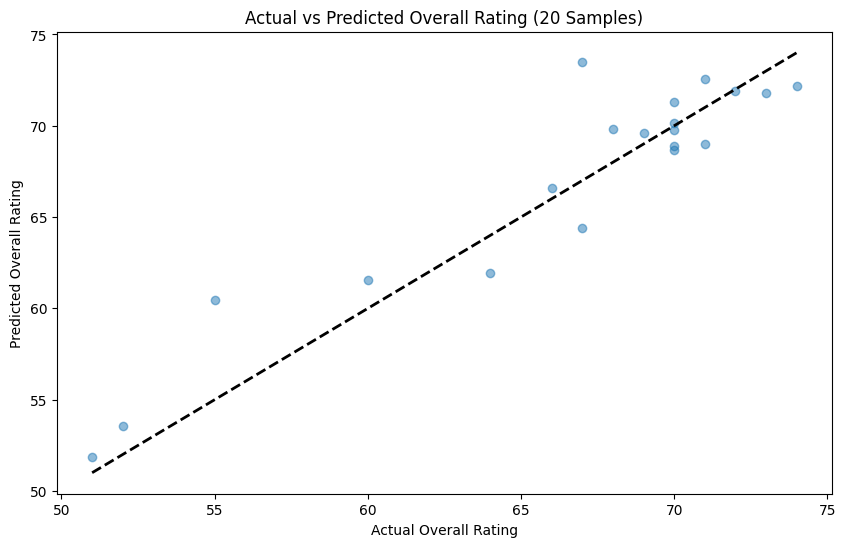

In [64]:
import matplotlib.pyplot as plt

# Select 20 samples
y_test_sample = y_test[:20]
y_pred_sample = y_pred[:20]

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_pred_sample, alpha=0.5)
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], 'k--', lw=2)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall Rating (20 Samples)')
plt.show()

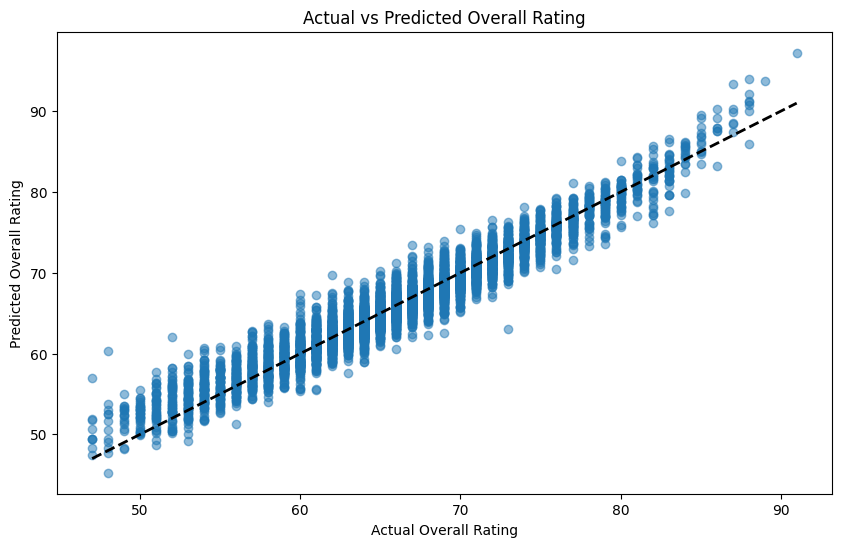

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall Rating')
plt.show()

In [42]:
model = LinearRegression()

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print('Cross Validation Mean Squared Error:', -scores.mean())

Cross Validation Mean Squared Error: 3.695913874127463


In [47]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error')
print('Leave-One-Out Mean Squared Error:', -scores.mean())

Leave-One-Out Mean Squared Error: 3.2860683959775785


In [51]:
scores[:25]

array([-18.81480773, -18.97088256,  -3.30322091, -10.85482375,
       -25.04135066, -38.96046732, -15.96778121,  -0.20586818,
       -23.66564564,  -0.33666898,  -6.37275595, -26.34108903,
       -66.94007457, -21.19321591,  -0.34677261, -41.45513378,
        -1.21079892,  -4.9670494 ,  -1.45878692,  -8.81828979,
       -10.50576809,  -0.55036604,  -2.13799164,  -8.64546368,
       -11.57048764])

# Use target encoder for column 'nationality'

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
file_path = 'processed data/fe_missForest_data.csv'
df = pd.read_csv(file_path)

<Axes: >

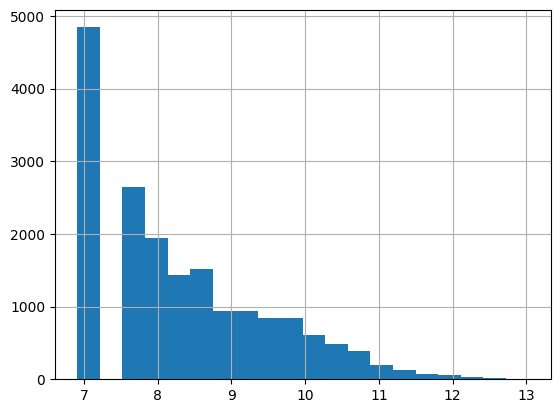

In [12]:
df['wage_euro'].hist(bins=20)

In [50]:
df= pd.read_csv('processed data/unencoded_nation_data.csv')
df.head(10)

,age,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),...,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST,height_cm
0,27,76.2,Denmark,88,89,69500000.0,205000.0,1,3,5,...,0,0,0,0,0,1,0,0,0,175.26
1,25,83.9,France,88,91,73000000.0,255000.0,1,4,4,...,0,0,0,0,0,0,0,0,0,190.50
2,27,59.0,Italy,88,88,62000000.0,165000.0,1,3,4,...,0,0,1,0,0,0,0,0,1,162.56
3,27,88.9,Senegal,88,91,60000000.0,135000.0,1,3,3,...,0,0,0,0,0,0,0,0,0,187.96
4,27,92.1,Netherlands,88,90,59500000.0,215000.0,1,3,3,...,0,0,0,0,0,0,0,0,0,193.04
5,20,73.0,France,88,95,81000000.0,100000.0,1,3,4,...,0,0,0,0,0,1,1,0,1,177.80
6,30,69.9,Argentina,89,89,64500000.0,300000.0,1,4,4,...,0,0,0,0,0,0,0,0,1,172.72
7,32,92.1,Germany,89,89,38000000.0,130000.0,1,5,4,...,0,0,0,0,0,0,0,0,0,193.04
8,32,77.1,Uruguay,89,89,60000000.0,200000.0,1,4,4,...,0,0,0,0,0,0,0,0,1,185.42
9,30,76.2,Spain,89,89,51500000.0,315000.0,1,4,3,...,0,0,0,0,0,0,0,0,0,187.96


In [82]:
df = pd.read_csv('missForest_data.csv')
df.head(10)

,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),...,positions_GK,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST
0,27,177.606642,76.2,Denmark,88,89,69500000.0,205000.0,1,3,...,0,0,0,0,0,0,1,0,0,0
1,25,190.500000,83.9,France,88,91,73000000.0,255000.0,1,4,...,0,0,0,0,0,0,0,0,0,0
2,27,162.560000,59.0,Italy,88,88,62000000.0,165000.0,1,3,...,0,0,0,1,0,0,0,0,0,1
3,27,187.960000,88.9,Senegal,88,91,60000000.0,135000.0,1,3,...,0,0,0,0,0,0,0,0,0,0
4,27,193.040000,92.1,Netherlands,88,90,59500000.0,215000.0,1,3,...,0,0,0,0,0,0,0,0,0,0
5,20,177.904265,73.0,France,88,95,81000000.0,100000.0,1,3,...,0,0,0,0,0,0,1,1,0,1
6,30,172.720000,69.9,Argentina,89,89,64500000.0,300000.0,1,4,...,0,0,0,0,0,0,0,0,0,1
7,32,193.040000,92.1,Germany,89,89,38000000.0,130000.0,1,5,...,1,0,0,0,0,0,0,0,0,0
8,32,185.420000,77.1,Uruguay,89,89,60000000.0,200000.0,1,4,...,0,0,0,0,0,0,0,0,0,1
9,30,187.960000,76.2,Spain,89,89,51500000.0,315000.0,1,4,...,0,0,0,0,0,0,0,0,0,0


# Thêm is_star_player, bỏ international_reputation sẽ ngon hơn

In [13]:
df['is_star_player']

0         True
1         True
2         True
3         True
4         True
         ...  
17942    False
17943    False
17944    False
17945    False
17946    False
Name: is_star_player, Length: 17947, dtype: bool

In [14]:
# import pandas as pd
# import category_encoders as ce

# # Khởi tạo Target Encoder
# target_encoder = ce.TargetEncoder(cols=['nationality'])

# # Áp dụng Target Encoding, sử dụng 'overall_rating' làm cột mục tiêu
# df['nationality_encoded'] = target_encoder.fit_transform(df['nationality'], df['overall_rating'])

# # Xóa cột 'nationality' ban đầu nếu không cần thiết
# df = df.drop('nationality', axis=1)

In [15]:
# # Xem kết quả sau khi mã hóa
# print("\nDữ liệu sau khi áp dụng Target Encoding:")
# df.head()

In [16]:
df['nationality'].value_counts()

nationality
England                 1657
Germany                 1199
Spain                   1070
France                   925
Argentina                903
                        ... 
Kuwait                     1
New Caledonia              1
Oman                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Name: count, Length: 160, dtype: int64

In [17]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

X = df[['nationality']]
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

encoder = TargetEncoder()
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

df_train_encoded = X_train_encoded.assign(overall_rating=y_train.values)

df_train_encoded

,nationality,overall_rating
15634,68.070064,73
8147,69.779778,62
13167,65.710351,69
10766,63.675918,65
15695,71.076067,73
...,...,...
11284,66.126923,66
11964,68.036495,67
5390,62.959740,54
860,68.902715,73


In [20]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

# Tách dữ liệu thành biến mục tiêu và các thuộc tính đầu vào
y = df['overall_rating']  # Biến mục tiêu
X = df.drop(columns=['overall_rating'])  # Các thuộc tính đầu vào
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Áp dụng Target Encoding cho cột 'nationality'
target_encoder = TargetEncoder()
X_train['nationality_encoded'] = target_encoder.fit_transform(X_train['nationality'], y_train)
X_test['nationality_encoded'] = target_encoder.transform(X_test['nationality'])

# Xóa cột 'nationality' gốc nếu không cần thiết
X_train.drop(columns=['nationality'], inplace=True)
X_test.drop(columns=['nationality'], inplace=True)

print("Dữ liệu huấn luyện sau khi mã hóa:")
X_train.head()


Dữ liệu huấn luyện sau khi mã hóa:


,age,height_cm,weight_kgs,potential,preferred_foot,weak_foot(1-5),skill_moves(1-5),crossing,finishing,heading_accuracy,...,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST,nationality_encoded
15634,31,182.880000,77.1,73,0,4,3,64,73,58,...,0,0,1,0,0,0,0,0,1,68.070064
8147,20,182.102830,78.0,78,0,3,3,44,58,45,...,0,0,0,0,0,0,0,0,0,69.779778
13167,23,181.366882,73.0,77,0,3,3,64,47,56,...,0,0,0,0,1,0,0,0,0,65.710351
10766,27,190.500000,76.2,67,0,3,2,53,38,60,...,0,0,0,0,0,0,0,0,0,63.675918
15695,24,182.880000,76.2,78,1,4,3,68,62,57,...,0,0,0,0,0,0,0,0,0,71.076067


In [21]:
print("\nDữ liệu kiểm tra sau khi mã hóa:")
X_test.head()


Dữ liệu kiểm tra sau khi mã hóa:


,age,height_cm,weight_kgs,potential,preferred_foot,weak_foot(1-5),skill_moves(1-5),crossing,finishing,heading_accuracy,...,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST,nationality_encoded
7341,19,185.420000,76.2,80,0,2,2,36,10,62,...,0,0,0,0,0,0,0,0,0,68.902715
4585,35,175.260000,77.1,55,0,2,2,60,21,40,...,0,0,0,0,1,0,0,1,0,64.501318
9676,23,175.260000,58.1,68,0,3,3,48,61,59,...,0,0,0,0,0,0,0,0,1,71.364444
13889,19,167.640000,71.2,84,1,4,3,65,66,53,...,0,0,0,0,0,1,1,0,0,68.902715
4779,19,181.639149,69.9,69,0,3,2,33,53,51,...,0,0,0,0,0,0,0,0,1,63.233871


In [26]:
df['overall_rating'].corr(df['release_clause_euro'])

np.float64(0.9112448777580779)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Xây dựng pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán giá trị
y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

In [20]:
evaluate_model(y_train, y_train_pred, y_test, y_pred)

Train Set:
MSE: 1.105
MAE: 0.762
R2: 0.977

Test Set:
MSE: 1.136
MAE: 0.771
R2: 0.976


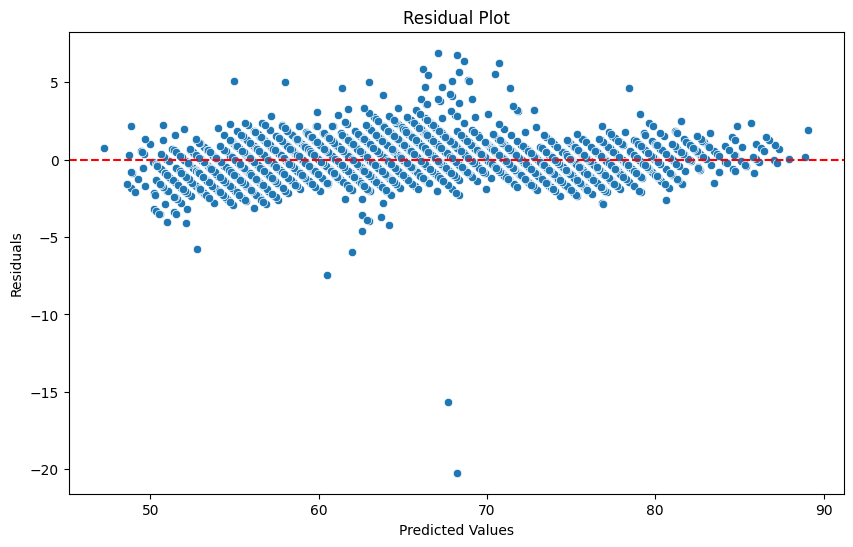

In [31]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
# plt.yticks(np.arange(-10, 11, 2))  # Đặt các độ chia cụ thể ở trục y từ -10 đến 10, mỗi độ chia cách nhau 2 đơn vị
plt.show()

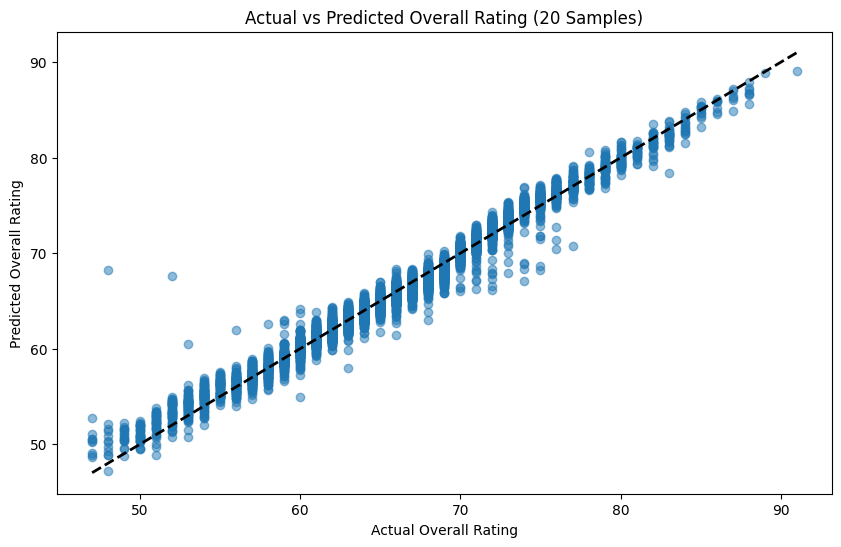

In [91]:
import matplotlib.pyplot as plt

# Select 20 samples
y_test_sample = y_test[:]
y_pred_sample = y_pred[:]

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_pred_sample, alpha=0.5)
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], 'k--', lw=2)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall Rating (20 Samples)')
plt.show()

In [76]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Tách dữ liệu thành biến mục tiêu và các thuộc tính đầu vào
y = df['overall_rating']
X = df.drop(columns=['overall_rating'])

# Tách tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Tạo pipeline với TargetEncoder, StandardScaler và LinearRegression
pipeline = Pipeline([
    ('target_encoder', TargetEncoder(cols=['nationality'])),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Sử dụng cross_val_score để đánh giá mô hình với 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Hiển thị kết quả
print("Cross-Validation Scores (MSE):", -scores)
print("Mean MSE:", -scores.mean())


Cross-Validation Scores (MSE): [0.9113412  3.95276696 0.77185522 1.14343318 1.56730058]
Mean MSE: 1.6693394272116229


In [77]:
# Định nghĩa số lượng folds cho cross-validation
cv = 5

# Sử dụng cross_val_score để tính toán R^2 score
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores cho {cv}-fold cross-validation: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

# Sử dụng cross_val_score để tính toán MSE (sử dụng scoring 'neg_mean_squared_error')
mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
# Chuyển đổi MSE về giá trị dương
mse_scores = -mse_scores
print(f"MSE cho {cv}-fold cross-validation: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

# Đánh giá Mean Absolute Error (MAE)
mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE cho {cv}-fold cross-validation: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores cho 5-fold cross-validation: [0.9642842  0.63812941 0.68236285 0.40264792 0.8853557 ]
R^2 trung bình: 0.715 ± 0.198

MSE cho 5-fold cross-validation: [0.92307358 3.952888   0.76896961 1.14675449 1.56832079]
MSE trung bình: 1.672± 1.172

MAE cho 5-fold cross-validation: [0.72810459 1.5297466  0.67628293 0.85317722 0.94100881]
MAE trung bình: 0.946 ± 0.306


# Kmeans to cluster nationality

In [23]:
import pandas as pd
df = pd.read_csv('unencoded_nation_data.csv')

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Giả sử bạn có DataFrame df với cột 'nationality' và các đặc trưng khác
# Đầu tiên, mã hóa One-Hot cho 'nationality'
one_hot_encoder = OneHotEncoder()
nationality_encoded = one_hot_encoder.fit_transform(df[['nationality']]).toarray()

# Áp dụng K-Means để phân cụm các quốc gia
n_clusters = 10  # Số lượng cụm mong muốn
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
nationality_clusters = kmeans.fit_predict(nationality_encoded)

# Thêm kết quả phân cụm vào DataFrame
df['nationality_cluster'] = nationality_clusters

df[['nationality', 'nationality_cluster']].head()


,nationality,nationality_cluster
0,Denmark,2
1,France,2
2,Italy,7
3,Senegal,8
4,Netherlands,2


In [25]:
df.head()

,age,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),...,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST,height_cm,nationality_cluster
0,27,76.2,Denmark,88,89,69500000.0,205000.0,1,3,5,...,0,0,0,0,1,0,0,0,175.26,2
1,25,83.9,France,88,91,73000000.0,255000.0,1,4,4,...,0,0,0,0,0,0,0,0,190.50,2
2,27,59.0,Italy,88,88,62000000.0,165000.0,1,3,4,...,0,1,0,0,0,0,0,1,162.56,7
3,27,88.9,Senegal,88,91,60000000.0,135000.0,1,3,3,...,0,0,0,0,0,0,0,0,187.96,8
4,27,92.1,Netherlands,88,90,59500000.0,215000.0,1,3,3,...,0,0,0,0,0,0,0,0,193.04,2


In [26]:
df.drop(['nationality'], axis=1, inplace=True)

In [27]:
df.shape

(17947, 58)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [29]:
y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_pred)

Train Set:
MSE: 3.24
MAE: 1.39
R2: 0.93

Test Set:
MSE: 3.31
MAE: 1.41
R2: 0.93


In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Hiển thị với 2 chữ số thập phân
formatted_scores = [-score for score in scores]
formatted_scores = [f"{score:.2f}" for score in formatted_scores]
mean_score = -scores.mean()

print("Cross-Validation Scores (MSE):", formatted_scores)
print("Mean MSE:", f"{mean_score:.2f}")

Cross-Validation Scores (MSE): ['2.98', '11.30', '3.17', '2.87', '3.38']
Mean MSE: 4.74


In [33]:
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Hiển thị với 2 chữ số thập phân
formatted_scores = [f"{score:.2f}" for score in scores]
mean_score = scores.mean()

print("Cross-Validation Scores (R^2):", formatted_scores)
print("Mean R^2:", f"{mean_score:.2f}")

Cross-Validation Scores (R^2): ['0.88', '-0.03', '-0.31', '-0.49', '0.75']
Mean R^2: 0.16


# One Hot Encoder + PCA to handle nationality

In [37]:
import pandas as pd
df = pd.read_csv('unencoded_nation_data.csv')

In [71]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [69]:
from sklearn.preprocessing import OneHotEncoder

top_20_nationalities = df['nationality'].value_counts().nlargest(20).index
df['nationality_top_20'] = df['nationality'].apply(lambda x: x if x in top_20_nationalities else 'Other')


one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first') 
nationality_encoded = one_hot_encoder.fit_transform(df[['nationality_top_20']])

nationality_encoded_df = pd.DataFrame(nationality_encoded, columns=one_hot_encoder.get_feature_names_out(['nationality_top_20']))
df = pd.concat([df, nationality_encoded_df], axis=1)

df.drop(['nationality', 'nationality_top_20'], axis=1, inplace=True)
df.head()


,age,weight_kgs,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,nationality_top_20_Mexico,nationality_top_20_Netherlands,nationality_top_20_Norway,nationality_top_20_Other,nationality_top_20_Poland,nationality_top_20_Portugal,nationality_top_20_Republic of Ireland,nationality_top_20_Spain,nationality_top_20_Sweden,nationality_top_20_United States
0,27,76.2,88,89,69500000.0,205000.0,1,3,5,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25,83.9,88,91,73000000.0,255000.0,1,4,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,59.0,88,88,62000000.0,165000.0,1,3,4,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,88.9,88,91,60000000.0,135000.0,1,3,3,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27,92.1,88,90,59500000.0,215000.0,1,3,3,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [75]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled_pca, y_train)
y_pred = linear_regression.predict(X_test_scaled_pca)

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error: %.2f' % mse)
print('Mean absolute error: %.2f' % mae)
print('R2 score: %.2f' % r2)


Mean squared error: 4.85
Mean absolute error: 1.70
R2 score: 0.90


In [1]:
from sklearn.model_selection import train_test_split

X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

NameError: name 'df' is not defined

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_pred)

Train Set:
MSE: 0.033
MAE: 0.103
R2: 0.999

Test Set:
MSE: 0.245
MAE: 0.276
R2: 0.995


In [53]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)

xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [54]:

y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

In [55]:
evaluate_model(y_train, y_train_pred, y_test, y_pred)

Train Set:
MSE: 0.044
MAE: 0.157
R2: 0.999

Test Set:
MSE: 0.276
MAE: 0.348
R2: 0.994


In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [57]:
y_pred = gradient_boosting.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error: %.2f' % mse)
print('Mean absolute error: %.2f' % mae)
print('R2 score: %.2f' % r2)

Mean squared error: 0.56
Mean absolute error: 0.53
R2 score: 0.99
